# Ejercicio Covid-19

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Actualizar submodule: git submodule update

In [19]:
# Datos https://github.com/CSSEGISandData/COVID-19.git
data = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv" )
data.sample(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
28,NaN,Brazil,-14.2350,-51.9253,0,0,0,0,0,0,...,151,162,200,321,372,621,793,1021,1546,1924
160,NaN,Monaco,43.7333,7.4167,0,0,0,0,0,0,...,2,2,7,7,7,7,11,11,23,23
143,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,8086,8162,8236,8320,8413,8565,8652,8799,8961,8961


In [20]:
# Número de Países diferentes
print(data['Country/Region'].nunique())

168


In [21]:
#Saco un dataset con solo los países
data_countries = data.groupby("Country/Region", as_index=False).sum()
#Se ve que están todos y comprobado que suma
data_countries[::]

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,11,16,21,22,22,22,24,24,40,40
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,104
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,37,48,54,60,74,87,90,139,201,230
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,133
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,0,...,0,1,6,10,15,23,33,43,43,46
164,Venezuela,6.4238,-66.5897,0,0,0,0,0,0,0,...,2,10,17,33,36,42,42,70,70,77
165,Vietnam,16.0000,108.0000,0,2,2,2,2,2,2,...,53,56,61,66,75,85,91,94,113,123
166,Zambia,-15.4167,28.2833,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,3,3


In [22]:
# Hago transposición de los datos para mover las columnas en filas 
data_trans = data_countries.set_index('Country/Region').transpose()
# Y me quedo sólo con los datos temporales y número de casos
data_time = data_trans[2:]
data_time.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [23]:
# Cogemos solo determinados países
data_time = data_time[['China', 'France', 'Germany', 'Iran','Italy', 'Korea, South', 'Norway','Spain', 'US', 'United Kingdom']]

# Para coger los países que en día 20 tienen más de 1000 casos: data_countries = data_countries[data_countries["3/17/20"] >= 1000 ]
data_time.head(2)

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
1/22/20,548.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1/23/20,643.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
#Convierto la columna fecha en datetime
from datetime import date
data_time.index = pd.to_datetime(data_time.index)
data_time.head()

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2020-01-22,548.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2020-01-23,643.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2020-01-24,920.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
2020-01-25,1406.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
2020-01-26,2075.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0


In [27]:
# Coger solo datos del último mes
data_time_filter = data_time[-30:]
# Si quiero quitar China: data_time_filter = data_time_filter.drop('China', axis=1)
data_time_filter.tail(2)

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2020-03-22,81435.0,16243.0,24873.0,21638.0,59138.0,8961.0,2385.0,28768.0,33276.0,5745.0
2020-03-23,81498.0,20123.0,29056.0,23049.0,63927.0,8961.0,2621.0,35136.0,43847.0,6726.0


In [28]:
#Hago listado de Countries
list_countries = data_time_filter.columns
list_countries

Index(['China', 'France', 'Germany', 'Iran', 'Italy', 'Korea, South', 'Norway',
       'Spain', 'US', 'United Kingdom'],
      dtype='object', name='Country/Region')

In [29]:
'''Vamos a hacer un gráfico para ver los casos confirmados (desde caso 100)'''

#Exporto los datos en diferentes arhcivos con casa país
for country in list_countries:
    dataX = data_time_filter[country]
    dataX = dataX[dataX > 100]
    dataX.to_csv('data_' + country + ".csv", index=False, header= country)

# from glob import glob
# filenames = glob('*.csv')
# dataframes = [pd.read_csv(f) for f in filenames]
# dataframes

# Quitar fechas de index, y ponerlo con número
# data_time_filter = data_time_filter.reset_index(drop=True)
# data_time_filter

In [30]:
# Creamos los CSV
dataframe_France = pd.read_csv('data_France.csv')
dataframe_China = pd.read_csv('data_China.csv')
dataframe_Germany = pd.read_csv('data_Germany.csv')
dataframe_Iran = pd.read_csv('data_Iran.csv')
dataframe_Italy = pd.read_csv('data_Italy.csv')
dataframe_Korea = pd.read_csv('data_Korea, South.csv')
dataframe_Norway = pd.read_csv('data_Norway.csv')
dataframe_Spain = pd.read_csv('data_Spain.csv')
dataframe_US = pd.read_csv('data_US.csv')
dataframe_UnitedKingdom = pd.read_csv('data_United Kingdom.csv')

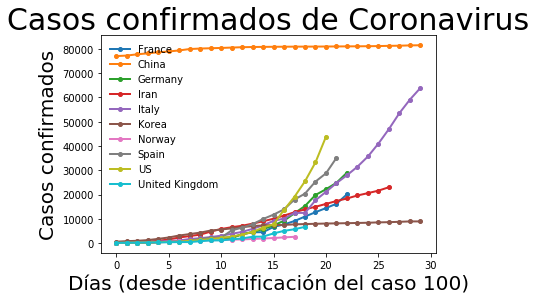

In [31]:
# Lo ploteo
plt.plot(dataframe_France, label='France', marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_China, label='China',marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Germany, label='Germany' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Iran, label='Iran',marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Italy, label='Italy',marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Korea, label='Korea' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Norway, label='Norway' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Spain, label='Spain' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_US, label='US' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_UnitedKingdom, label='United Kingdom',marker='o', markersize=4, linewidth=2)

plt.legend(loc='upper left', frameon=False, fancybox=True)
plt.title('Casos confirmados de Coronavirus', {'fontsize': 30})

plt.xlabel("Días (desde identificación del caso 100)", {'fontsize': 20})
plt.ylabel("Casos confirmados", {'fontsize': 20})
plt.show()

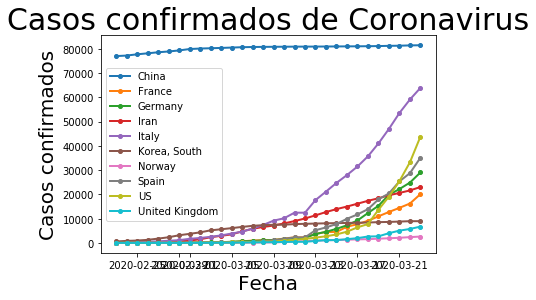

In [32]:
'''Vamos a hacer un gráfico para ver los casos confirmados por fechas'''
plt.plot(data_time_filter, label='France', marker='o', markersize=4, linewidth=2)
plt.title('Casos confirmados de Coronavirus', {'fontsize': 30})
plt.xlabel("Fecha", {'fontsize': 20})
plt.ylabel("Casos confirmados", {'fontsize': 20})
plt.legend(list_countries)

plt.show()


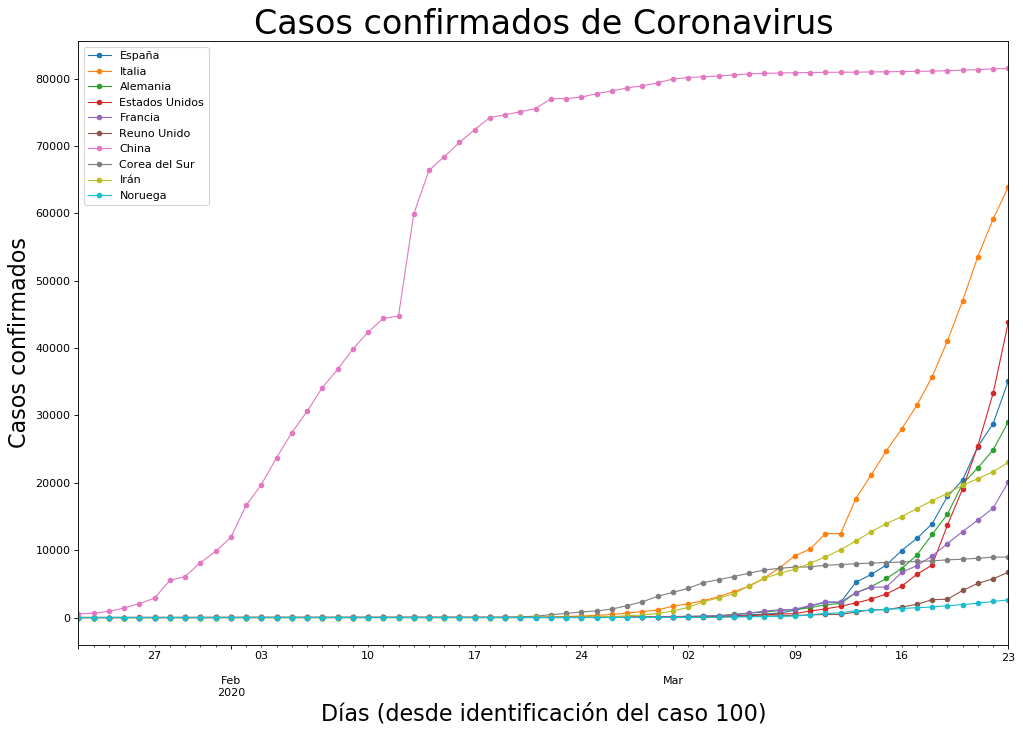

In [34]:
# Otra forma

fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')

legend = []

data_time.loc[:,'Spain'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('España')
data_time.loc[:,'Italy'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Italia')
data_time.loc[:,'Germany'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Alemania')
data_time.loc[:,'US'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Estados Unidos')
data_time.loc[:,'France'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Francia')
data_time.loc[:,'United Kingdom'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Reuno Unido')
data_time.loc[:,'China'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('China')
data_time.loc[:,'Korea, South'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Corea del Sur')
data_time.loc[:,'Iran'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Irán')
data_time.loc[:,'Norway'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Noruega')


plt.legend(legend)
plt.title('Casos confirmados de Coronavirus', {'fontsize': 30})

plt.xlabel("Días (desde identificación del caso 100)", {'fontsize': 20})
plt.ylabel("Casos confirmados", {'fontsize': 20})

plt.show()

## Preparar para subir a DRIVE

In [16]:
#Exportar CSV por días progresivos
data_drive_days = data_time_filter.loc[:,list_countries]
data_drive_days.to_csv('covid19_data_drive_days.csv', sep = ';', encoding="utf-8")
data_drive_days.head(2)

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2020-02-23,77022.0,12.0,16.0,43.0,155.0,602.0,0.0,2.0,15.0,9.0
2020-02-24,77241.0,12.0,16.0,61.0,229.0,833.0,0.0,2.0,51.0,13.0


In [17]:
# Rellenar los 0 por NaN y expoertar
data_drive_from100 = data_time_filter.loc[:,list_countries].copy()
data_drive_from100 = data_drive_from100.replace(0, 'null')
#Exportar CSV desde caso 100
data_drive_from100.to_csv('covid19_data_drive_from100.csv', sep = ';')
data_drive_from100.head(2)

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2020-02-23,77022.0,12.0,16.0,43.0,155.0,602.0,null,2.0,15.0,9.0
2020-02-24,77241.0,12.0,16.0,61.0,229.0,833.0,null,2.0,51.0,13.0


## Opción para subir archivos al DRIVE

In [213]:
'''Conectando con el DRIVE'''
# https://towardsdatascience.com/how-to-manage-files-in-google-drive-with-python-d26471d91ecd
# !pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
# !pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()
gauth.LocalWebserverAuth() # client_secrets.json need to be in the same directory as the script
drive = GoogleDrive(gauth)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=58971579011-eee528qobf8hqh42o94galvgh24s0eem.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [316]:
'''Primero borro los archivos que hay'''

fileList = drive.ListFile({'q': "'15f-P5KEjNMW3H3KmkV7W38o3l-mm-Vt3' in parents and trashed=false"}).GetList()
for file in fileList:
  print('Title: %s, ID: %s' % (file['title'], file['id']))
   # Get the folder ID that you want
  if(file['title'] == "Covid-19_excels"):
      fileID = file['id']
  
# Initialize GoogleDriveFile instance with file id.
file1 = drive.CreateFile({'id': fileID})
file1.SetContentFile("covid19_data_drive_from100.csv")
file2.Delete()  # Permanently delete the file.
print('Deleted file 1 %s with mimeType %s' % (file2['title'], file2['mimeType']))
file3.Delete()  # Permanently delete the file.
print('Deleted file 2 %s with mimeType %s' % (file3['title'], file3['mimeType']))


Deleted file 1 covid19_data_drive_days.csv with mimeType text/csv
Deleted file 2 covid19_data_drive_from100.csv with mimeType text/csv


In [317]:
'''Para subir los archivos al drive'''

# View all folders and file in your Google Drive
fileList = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file in fileList:
  print('Title: %s, ID: %s' % (file['title'], file['id']))
  # Get the folder ID that you want
  if(file['title'] == "Covid-19_excels"):
      fileID = file['id']
      
file2 = drive.CreateFile({"mimeType": "text/csv", "parents": [{"kind": "drive#fileLink", "id": fileID}]})
file2.SetContentFile("covid19_data_drive_days.csv")
file2.Upload() # Upload the file.
print('Created file 1 %s with mimeType %s' % (file1['title'], file1['mimeType']))

file3 = drive.CreateFile({"mimeType": "text/csv", "parents": [{"kind": "drive#fileLink", "id": fileID}]})
file3.SetContentFile("covid19_data_drive_from100.csv")
file3.Upload() # Upload the file.
print('Created file 2 %s with mimeType %s' % (file2['title'], file2['mimeType']))

Title: Colab Notebooks, ID: 1l_i4D7zC0N0jB8n0QV32l1CRHENPVSuZ
Title: Covid-19_excels, ID: 1il3Z0N2CVf5qJy3yxzR8VnH37dwDKbMx
Created file 1 covid19_data_drive_from100.csv with mimeType text/csv
Created file 2 covid19_data_drive_days.csv with mimeType text/csv


## Opción para subir archivos desde FTP

In [ ]:
# https://www.atlantic.net/hipaa-compliant-cloud-storage/how-to-ftp-uploads-python/

'''Me quedé en:
- Para gráfica continua: Seleccionar muchos más días, que salga también China, su proceso.
- Para gráfica 100 casos: Reindexar fecha columna 0 con reindex para poner Día 1, Día 2...
- Ver cómo conectar vía FTP con mi web para subir archivos automáticamente
- Diseñar en DataWrapper
- Subir a wordpress.

'''

,ccaa,casos_totales,hospitalizados,casos_graves,fallecidos,nuevos_respecto_ayer,ultima_actualización
0,Andalucía,2471,1132,102,87,66,NaN
1,Aragón,758,384,66,37,3,NaN
2,Asturias,662,224,23,22,30,NaN
3,Baleares,478,127,35,10,19,NaN
4,Canarias,557,207,36,16,8,NaN
5,Cantabria,425,200,16,9,12,NaN
6,Castilla La Mancha,2465,1826,182,216,53,NaN
7,Castilla y León,2460,1057,137,124,140,NaN
8,Cataluña,7864,3599,551,282,728,NaN
9,Ceuta,6,0,0,0,0,NaN
